In [6]:
!pip3 install opencv-python

Looking in indexes: https://artifactory.blackstone.com/artifactory/api/pypi/python/simple


In [7]:
# Import the necessary libraries
import numpy as np
import cv2 
import matplotlib.pyplot as plt  #image plotting
%matplotlib inline
import os #For interacting with Operating System - we use it for going through files
import glob #For file name pattern matching

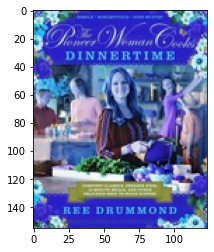

In [8]:
#  Loading the image to be tested
test_image = cv2.imread('images/img_1.jpg')

plt.imshow(test_image)

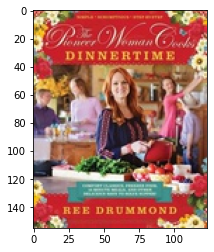

In [9]:
test_RGB=cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_RGB)

In [11]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [21]:
# convert to hsv colorspace
hsv = cv2.cvtColor(test_image, cv2.COLOR_BGR2HSV)

# lower bound and upper bound for Green color
lower_bound = np.array([0, 100, 100])	 
upper_bound = np.array([20, 255, 255])

# find the colors within the boundaries
mask = cv2.inRange(hsv, lower_bound, upper_bound)

In [22]:
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [  0, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0, 255, 255],
       [  0,   0,   0, ...,   0, 255, 255]], dtype=uint8)

In [23]:
#define kernel size  
kernel = np.ones((7,7),np.uint8)

# Remove unnecessary noise from mask

mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

In [25]:
# Segment only the detected region
segmented_img = cv2.bitwise_and(test_image, test_image, mask=mask)

In [26]:
# Find contours from the mask

contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output = cv2.drawContours(segmented_img, contours, -1, (0, 0, 255), 3)

# Showing the output

cv2.imshow("Output", output)

In [27]:
# Draw contour on original image

output = cv2.drawContours(test_image, contours, -1, (0, 0, 255), 3)

In [29]:
cv2.imshow("Output", output)

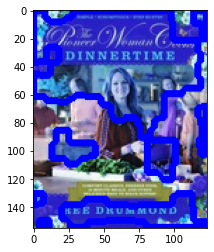

In [30]:
#draw a contour around everything red in the image
plt.imshow(output)